In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
import calendar
!pip install geopy
from geopy.geocoders import Nominatim

In [112]:
data = pd.read_csv(r"C:\Users\user.DESKTOP-1OSCPEL\Documents\security_incidents.csv")
data.drop(index=0, inplace=True)
data.head()

Incident ID  Year Month  Day Country Code     Country            Region  \
1          35  1997   NaN  NaN          NaN         NaN               NaN   
2           1  1997     1  NaN           KH    Cambodia  Banteay Meanchey   
3           2  1997     1  NaN           RW      Rwanda          Northern   
4           3  1997     2  NaN           TJ  Tajikistan               NaN   
5           4  1997     2  NaN           SO     Somalia        Lower Juba   

  District       City UN  ... Attack context         Location     Latitude  \
1      NaN        NaN  0  ...        Unknown          Unknown          NaN   
2      NaN        NaN  0  ...        Unknown          Unknown  14.07092855   
3  Musanze  Ruhengeri  0  ...           Raid  Office/compound     -1.49984   
4      NaN        NaN  4  ...        Unknown          Unknown   38.6281733   
5  Kismayo    Kismayo  0  ...        Unknown          Unknown    -0.358216   

    Longitude     Motive                       Actor type  \
1         NaN    Unknown                          Unknown   
2  103.099916    Unknown                          Unknown   
3    29.63497    Unknown                          Unknown   
4  70.8156541        NaN                          Unknown   
5   42.545087  Political  Non-state armed group: Regional   

               Actor name                                            Details  \
1                 Unknown  1 ICRC international staff wounded and 1 natio...   
2                 Unknown  1 ICRC national staff killed while working in ...   
3                 Unknown  3 INGO international (Spanish) staff killed, 1...   
4                 Unknown  3 UN national staff, 1 UN international (Niger...   
5  Al-Itihaad al-Islamiya  1 INGO international staff killed by Al ittiha...   

   Verified       Source  
1       Yes  Focal Point  
2  Archived     Archived  
3  Archived     Archived  
4  Archived     Archived  
5  Archived     Archived  

[5 rows x 41 columns]

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 1 to 4335
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Incident ID               4335 non-null   object
 1   Year                      4335 non-null   object
 2   Month                     4286 non-null   object
 3   Day                       3954 non-null   object
 4   Country Code              4301 non-null   object
 5   Country                   4329 non-null   object
 6   Region                    3967 non-null   object
 7   District                  3598 non-null   object
 8   City                      3346 non-null   object
 9   UN                        4335 non-null   object
 10  INGO                      4335 non-null   object
 11  ICRC                      4326 non-null   object
 12  NRCS and IFRC             4326 non-null   object
 13  NNGO                      4326 non-null   object
 14  Other                   

In [116]:
data.isnull().sum()

Incident ID                   0
Year                          0
Month                        49
Day                         381
Country Code                 34
Country                       6
Region                      368
District                    737
City                        989
UN                            0
INGO                          0
ICRC                          9
NRCS and IFRC                 9
NNGO                          9
Other                         0
Nationals killed              0
Nationals wounded             0
Nationals kidnapped           0
Total nationals               0
Internationals killed         0
Internationals wounded        0
Internationals kidnapped      0
Total internationals          0
Total killed                  0
Total wounded                 0
Total kidnapped               0
Total affected                0
Gender Male                   0
Gender Female                 0
Gender Unknown                0
Means of attack               0
Attack c

In [118]:
data.duplicated().sum()

0

### Data Cleaning

In [120]:
# Data types
# Numerical Data
num_cols = [
    'Incident ID', 'Nationals killed', 'Nationals wounded', 'Nationals kidnapped', 'Total nationals',
    'Internationals killed', 'Internationals wounded', 'Internationals kidnapped', 'Total internationals',
    'Total killed', 'Total wounded', 'Total kidnapped', 'Total affected', 'UN', 'INGO', 'ICRC', 'NRCS and IFRC', 'NNGO', 'Other', 'Gender Male', 'Gender Female', 'Gender Unknown']
for col in num_cols:
    data[col] = data[col].astype('Int64')
# Geospatial Data
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)
# Dates
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype('Int64')
data['Day'] = data['Day'].astype('Int64')


In [122]:

#  Sort by "Incident ID"
data = data.sort_values(by='Incident ID')

# Replace missing Month and Day values:
# Use forward fill; if the first rows are missing, then use backward fill as fallback.
data['Month'] = data['Month'].ffill().bfill()
data['Day'] = data['Day'].ffill().bfill()

# Adjust "Day" values so they are valid for the given month and year.
def max_day_in_month(year, month):
    # Returns the number of days in the month for the given year.
    return calendar.monthrange(year, month)[1]

def adjust_day(row):
    year = row['Year']
    month = row['Month']
    max_day = max_day_in_month(year, month)
    day = row['Day']
    # If the day exceeds the maximum for that month, replace it with the max.
    return day if day <= max_day else max_day

data['Day'] = data.apply(adjust_day, axis=1)

# 4. Create the "Date" column
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')

# 5. Finally, ensure the DataFrame is still sorted by "Incident ID"
data = data.sort_values(by='Incident ID')

# Display the first few rows to verify
print(data[['Incident ID', 'Year', 'Month', 'Day', 'Date']].head())



   Incident ID  Year  Month  Day       Date
2            1  1997      1   14 1997-01-14
3            2  1997      1   14 1997-01-14
4            3  1997      2   14 1997-02-14
5            4  1997      2   14 1997-02-14
6            5  1997      2   14 1997-02-14


In [136]:
# Set 'Incident ID' as the index
#data.set_index('Incident ID', inplace=True)

In [236]:
data['Actor Type'] = data['Actor type'].replace('State: unknown', 'Unknown')
data['Motive'] = data['Motive'].fillna('Unknown')

In [158]:
# rows where either Latitude or Longitude is missing
missing_coords = data[data['Latitude'].isna() | data['Longitude'].isna()]

In [152]:
# Define default coordinates for countries (approximate values for capitals)
default_coords = {
    'Honduras': (14.10, -87.20),         # Tegucigalpa
    'Mali': (12.65, -8.00),              # Bamako
    "Cote D'Ivoire": (5.35, -4.02),       # Abidjan
    'Bangladesh': (23.70, 90.40),         # Dhaka
    'Afghanistan': (34.52, 69.17),        # Kabul
    'South Sudan': (7.73, 33.50),         # Approx. for Pibor region
    'Occupied Palestinian Territories': (31.29, 34.26)  # Rafah in Gaza
}

# Initialize geolocator (using Nominatim)
geolocator = Nominatim(user_agent="incident_locator")

def get_coordinates(row):
    """
    Build a location string based on available details and try to geocode it.
    If geocoding fails, use default coordinates for the country if available.
    """
    # Build location string using City if available, otherwise Region, then Country.
    if pd.notna(row['City']) and row['City'].strip() not in ['', 'Unknown']:
        location_str = f"{row['City']}, {row['Country']}"
    elif pd.notna(row['Region']) and row['Region'].strip() not in ['', 'Unknown']:
        location_str = f"{row['Region']}, {row['Country']}"
    else:
        location_str = f"{row['Country']}"
    
    try:
        location = geolocator.geocode(location_str, timeout=10)
    except Exception as e:
        location = None

    if location is None:
        if row['Country'] in default_coords:
            lat, lon = default_coords[row['Country']]
            return pd.Series({'Latitude': lat, 'Longitude': lon})
        else:
            return pd.Series({'Latitude': np.nan, 'Longitude': np.nan})
    else:
        return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})

# Apply the geocoding function to fill in missing coordinates
new_coords = missing_coords.apply(get_coordinates, axis=1)

# Update the main DataFrame with the new coordinates
data.loc[new_coords.index, ['Latitude', 'Longitude']] = new_coords

# Verify new coordinates
print(data.loc[new_coords.index, ['Country', 'City', 'Latitude', 'Longitude']])


                                      Country     City   Latitude  Longitude
Incident ID                                                                 
35                                        NaN      NaN  46.314475  11.048029
61                                        NaN      NaN  46.314475  11.048029
94                                        NaN      NaN  46.314475  11.048029
136                                       NaN      NaN  46.314475  11.048029
165                                       NaN      NaN  46.314475  11.048029
275                                       NaN      NaN  46.314475  11.048029
3734                                 Honduras      NaN  15.257243 -86.075514
3735                                     Mali      NaN  16.370036  -2.290024
3736                               Bangladesh      NaN  24.476929  90.293441
3737                               Bangladesh      NaN  24.476929  90.293441
3738                            Cote D'Ivoire      NaN   7.989737  -5.567946

In [154]:
data.describe()

Year     Month          Day        UN      INGO      ICRC  \
count  4335.000000    4335.0  4335.000000    4335.0    4335.0    4326.0   
mean   2015.219146  6.553864    15.385467  0.409689  0.808304  0.051549   
min    1997.000000       1.0     1.000000       0.0       0.0       0.0   
25%    2010.000000       4.0     8.000000       0.0       0.0       0.0   
50%    2016.000000       7.0    15.000000       0.0       0.0       0.0   
75%    2021.000000      10.0    23.000000       0.0       1.0       0.0   
max    2025.000000      12.0    31.000000      92.0      49.0       8.0   
std       6.793306  3.416118     8.645546  2.103044  1.648628  0.420708   

       NRCS and IFRC      NNGO     Other  Nationals killed  ...  Total killed  \
count         4326.0    4326.0    4335.0            4335.0  ...        4335.0   
mean        0.120435  0.475035  0.024221           0.64729  ...      0.703114   
min              0.0       0.0       0.0               0.0  ...           0.0   
25%              0.0       0.0       0.0               0.0  ...           0.0   
50%              0.0       0.0       0.0               0.0  ...           0.0   
75%              0.0       1.0       0.0               1.0  ...           1.0   
max             19.0      15.0       5.0              70.0  ...          70.0   
std         0.781321  1.190794  0.223481          1.767895  ...       1.81422   

       Total wounded  Total kidnapped  Total affected  Gender Male  \
count         4335.0           4335.0          4335.0       4335.0   
mean        0.692734         0.492042        1.887889     0.890196   
min              0.0              0.0             0.0          0.0   
25%              0.0              0.0             1.0          0.0   
50%              0.0              0.0             1.0          1.0   
75%              1.0              0.0             2.0          1.0   
max             37.0             20.0            92.0         17.0   
std         1.514788         1.363161        2.660168     1.216117   

       Gender Female  Gender Unknown     Latitude    Longitude  \
count         4335.0          4335.0  4335.000000  4335.000000   
mean         0.13887        0.858362    16.815630    36.450196   
min              0.0             0.0   -34.883611  -102.283333   
25%              0.0             0.0     5.937031    28.738408   
50%              0.0             0.0    13.447898    34.454167   
75%              0.0             1.0    33.095579    45.363201   
max              7.0            92.0    52.253183   179.012274   
std         0.470741        2.525415    14.521618    30.070014   

                                Date  
count                           4335  
mean   2015-09-20 21:35:10.173010432  
min              1997-01-14 00:00:00  
25%              2010-11-27 00:00:00  
50%              2016-11-05 00:00:00  
75%              2021-05-31 00:00:00  
max              2025-12-19 00:00:00  
std                              NaN  

[8 rows x 27 columns]

In [156]:
# Unique values for categorical columns
categorical_cols = [
    'Country', 'Region', 'District', 'City', 
    'Means of attack', 'Attack context', 'Location', 
    'Motive', 'Actor type', 'Actor name', 'Details', 'Source'
]

data[categorical_cols].nunique()

Country              95
Region              458
District           1150
City               2096
Means of attack      14
Attack context        7
Location              7
Motive                6
Actor type           16
Actor name          280
Details            4295
Source               11
dtype: int64

In [240]:
incidents = data.copy()

In [162]:
incidents['Date'] = pd.to_datetime(incidents[['Year', 'Month', 'Day']], errors='coerce')

In [164]:
org_cols = ['UN', 'INGO', 'ICRC', 'NRCS and IFRC', 'NNGO', 'Other']
org_data = incidents.groupby('Date')[org_cols].sum().reset_index()
org_data

Date  UN  INGO  ICRC  NRCS and IFRC  NNGO  Other
0    1997-01-14   0     4     1              0     0      0
1    1997-02-14   5     1     2              0     0      0
2    1997-05-07   3     0     0             10     0      0
3    1997-06-08   0     1     0              0     0      0
4    1997-06-14   1     0     0              0     0      0
...         ...  ..   ...   ...            ...   ...    ...
3037 2025-02-14   0     0     0              0     2      0
3038 2025-02-17   1     0     0              0     0      0
3039 2025-02-20   0     1     0              0     0      0
3040 2025-03-06   1     0     0              0     0      0
3041 2025-12-19   0     0     0              0     2      0

[3042 rows x 7 columns]

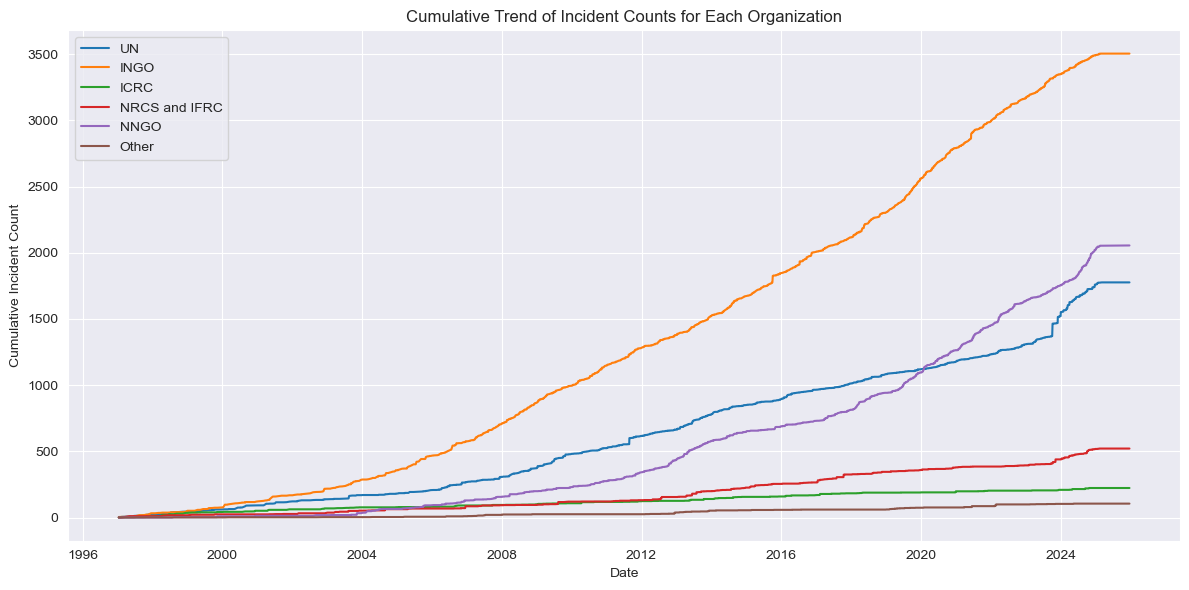

In [172]:

org_data_cumsum = org_data.copy()
for col in org_cols:
    org_data_cumsum[col] = org_data_cumsum[col].cumsum()

plt.figure(figsize=(12, 6))
for col in org_cols:
    sns.lineplot(data=org_data_cumsum, x='Date', y=col, label=col)
plt.title("Cumulative Trend of Incident Counts for Each Organization")
plt.xlabel("Date")
plt.ylabel("Cumulative Incident Count")
plt.legend()
plt.tight_layout()
plt.show()

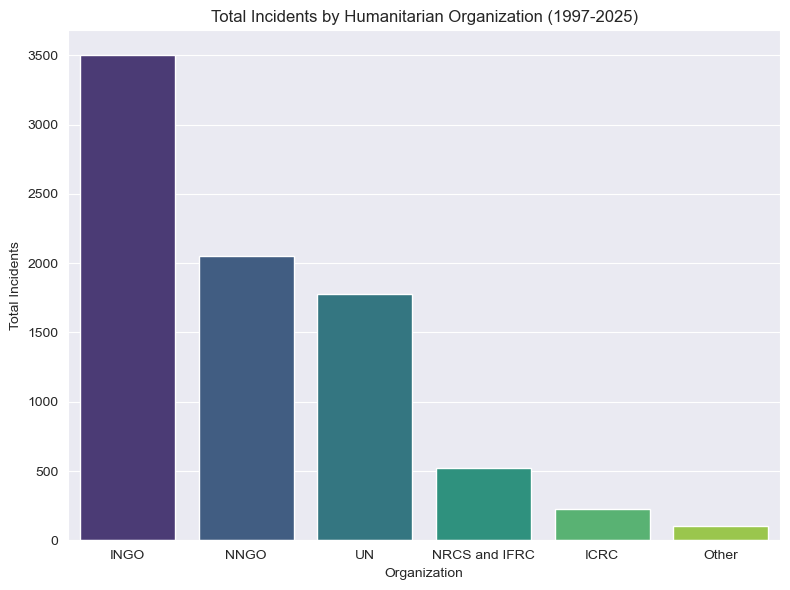

In [180]:
# Total incidents by Organization
total_incidents = org_data[org_cols].sum().reset_index()
total_incidents.columns = ['Organization', 'Total Incidents']
total_incidents = total_incidents.sort_values(by='Total Incidents', ascending=False)
# Plot a barplot of total incidents by organization
plt.figure(figsize=(8, 6))
sns.barplot(data=total_incidents, x='Organization', y='Total Incidents', palette='viridis')
plt.title("Total Incidents by Humanitarian Organization (1997-2025)")
plt.xlabel("Organization")
plt.ylabel("Total Incidents")
plt.tight_layout()
plt.show()


In [182]:
incidents['Total Fatalities'] = incidents['Nationals killed'] + incidents['Internationals killed']
incidents['Total Casualties'] = (incidents['Nationals wounded'] + incidents['Nationals kidnapped'] +
                          incidents['Internationals wounded'] + incidents['Internationals kidnapped'])
#fatalities_df =incidents[['Nationals killed', 'Internationals killed']].melt(var_name='Type', value_name='Fatalities')
#fatalities_df['Type'] = fatalities_df['Type'].map({
    #'Nationals killed': 'National',
    #'Internationals killed': 'International'
#})
#fatalities_sum = fatalities_df.groupby('Type')['Fatalities'].sum().reset_index()


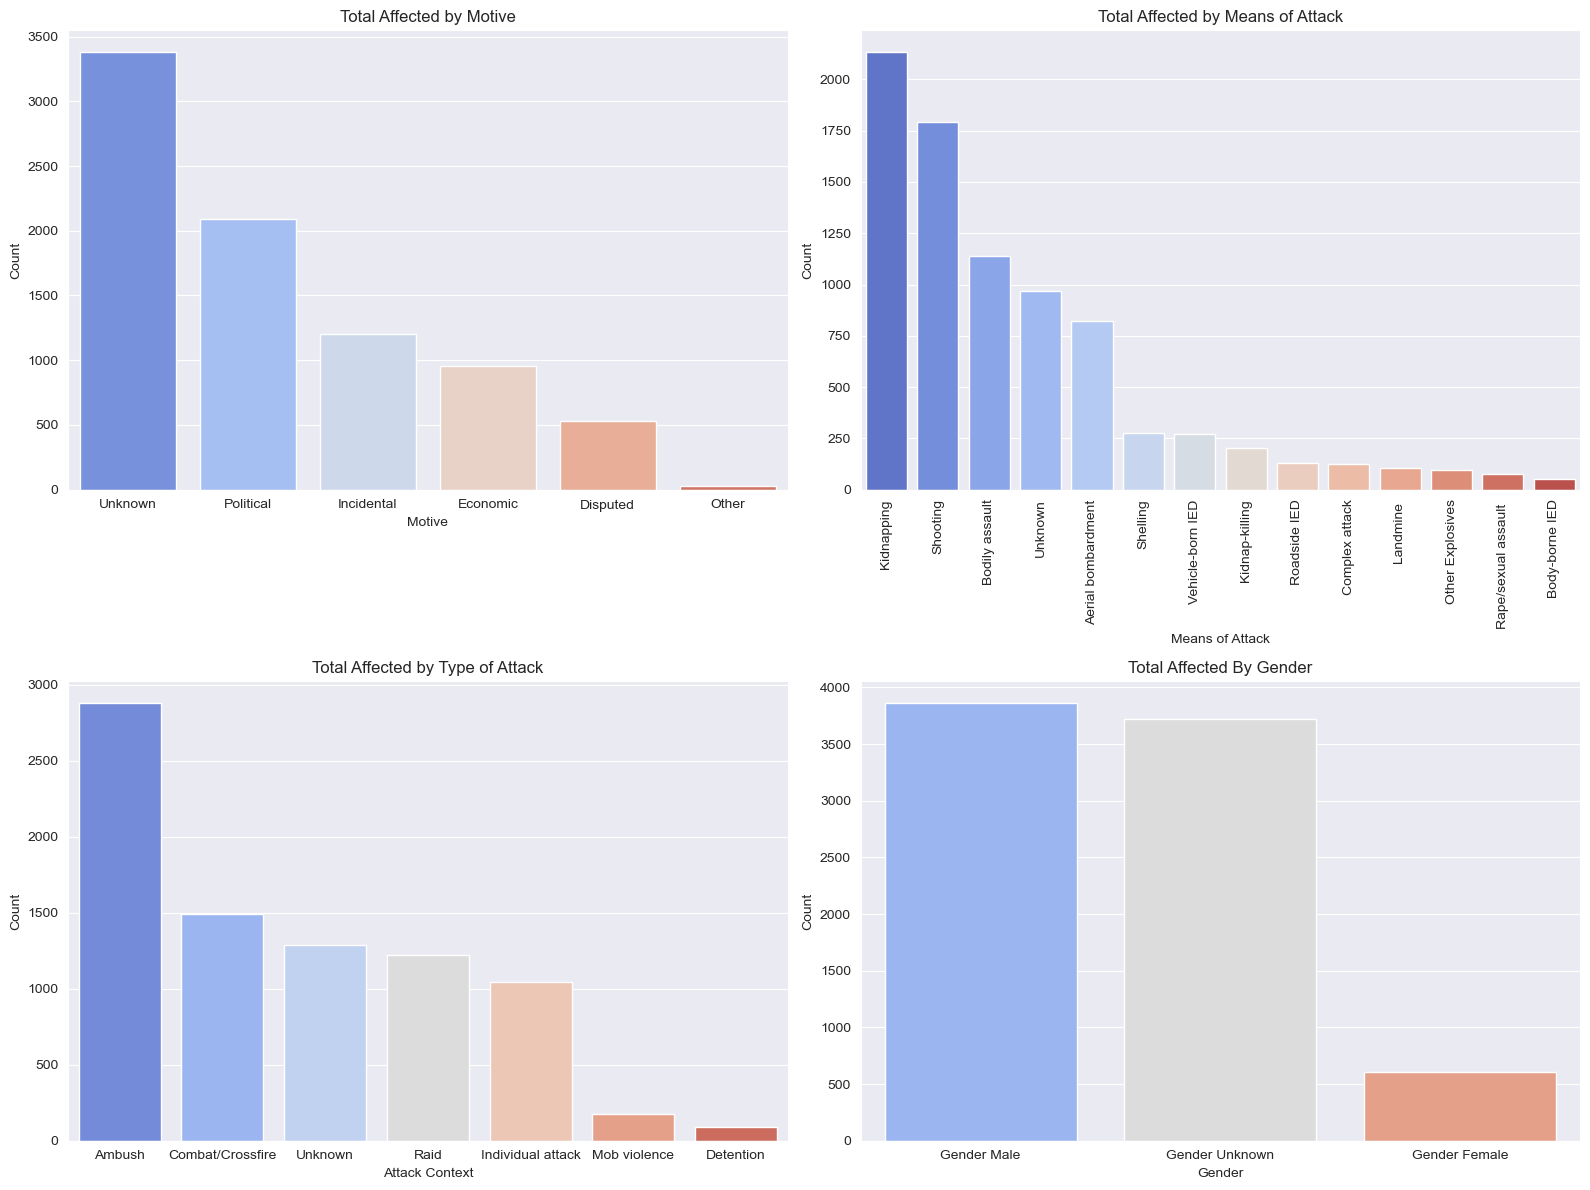

In [198]:

incidents = incidents.sort_values('Date')

# Grouping "Total affected" by each category
grouped_motive = incidents.groupby('Motive', as_index=False)['Total affected'].sum().sort_values(by='Total affected', ascending=False)
grouped_means  = incidents.groupby('Means of attack', as_index=False)['Total affected'].sum().sort_values(by='Total affected', ascending=False)
grouped_context = incidents.groupby('Attack context', as_index=False)['Total affected'].sum().sort_values(by='Total affected', ascending=False)
total_affected_gender = incidents[['Gender Male', 'Gender Female', 'Gender Unknown']].sum().reset_index()
total_affected_gender.columns = ['Gender', 'Total affected']
total_affected_gender = total_affected_gender.sort_values(by='Total affected', ascending=False)


# Create subplots: 2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Total affected by Motive
sns.barplot(ax=axes[0,0], data=grouped_motive, x='Motive', y='Total affected', palette='coolwarm')
axes[0,0].set_title("Total Affected by Motive")
axes[0,0].set_xlabel("Motive")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis='x', rotation=0)

# Subplot 2: Total affected by Means of Attack
sns.barplot(ax=axes[0,1], data=grouped_means, x='Means of attack', y='Total affected', palette='coolwarm')
axes[0,1].set_title("Total Affected by Means of Attack")
axes[0,1].set_xlabel("Means of Attack")
axes[0,1].set_ylabel("Count")
axes[0,1].tick_params(axis='x', rotation=90)

# Subplot 3: Total affected by Attack Context
sns.barplot(ax=axes[1,0], data=grouped_context, x='Attack context', y='Total affected', palette='coolwarm')
axes[1,0].set_title("Total Affected by Type of Attack")
axes[1,0].set_xlabel("Attack Context")
axes[1,0].set_ylabel("Count")
axes[1,0].tick_params(axis='x', rotation=0)

# Subplot 4: Total affected over Time
sns.barplot(data=total_affected_gender, x='Gender', y='Total affected', palette='coolwarm')
axes[1,1].set_title("Total Affected By Gender")
axes[1,1].set_xlabel("Gender")
axes[1,1].set_ylabel("Count")
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


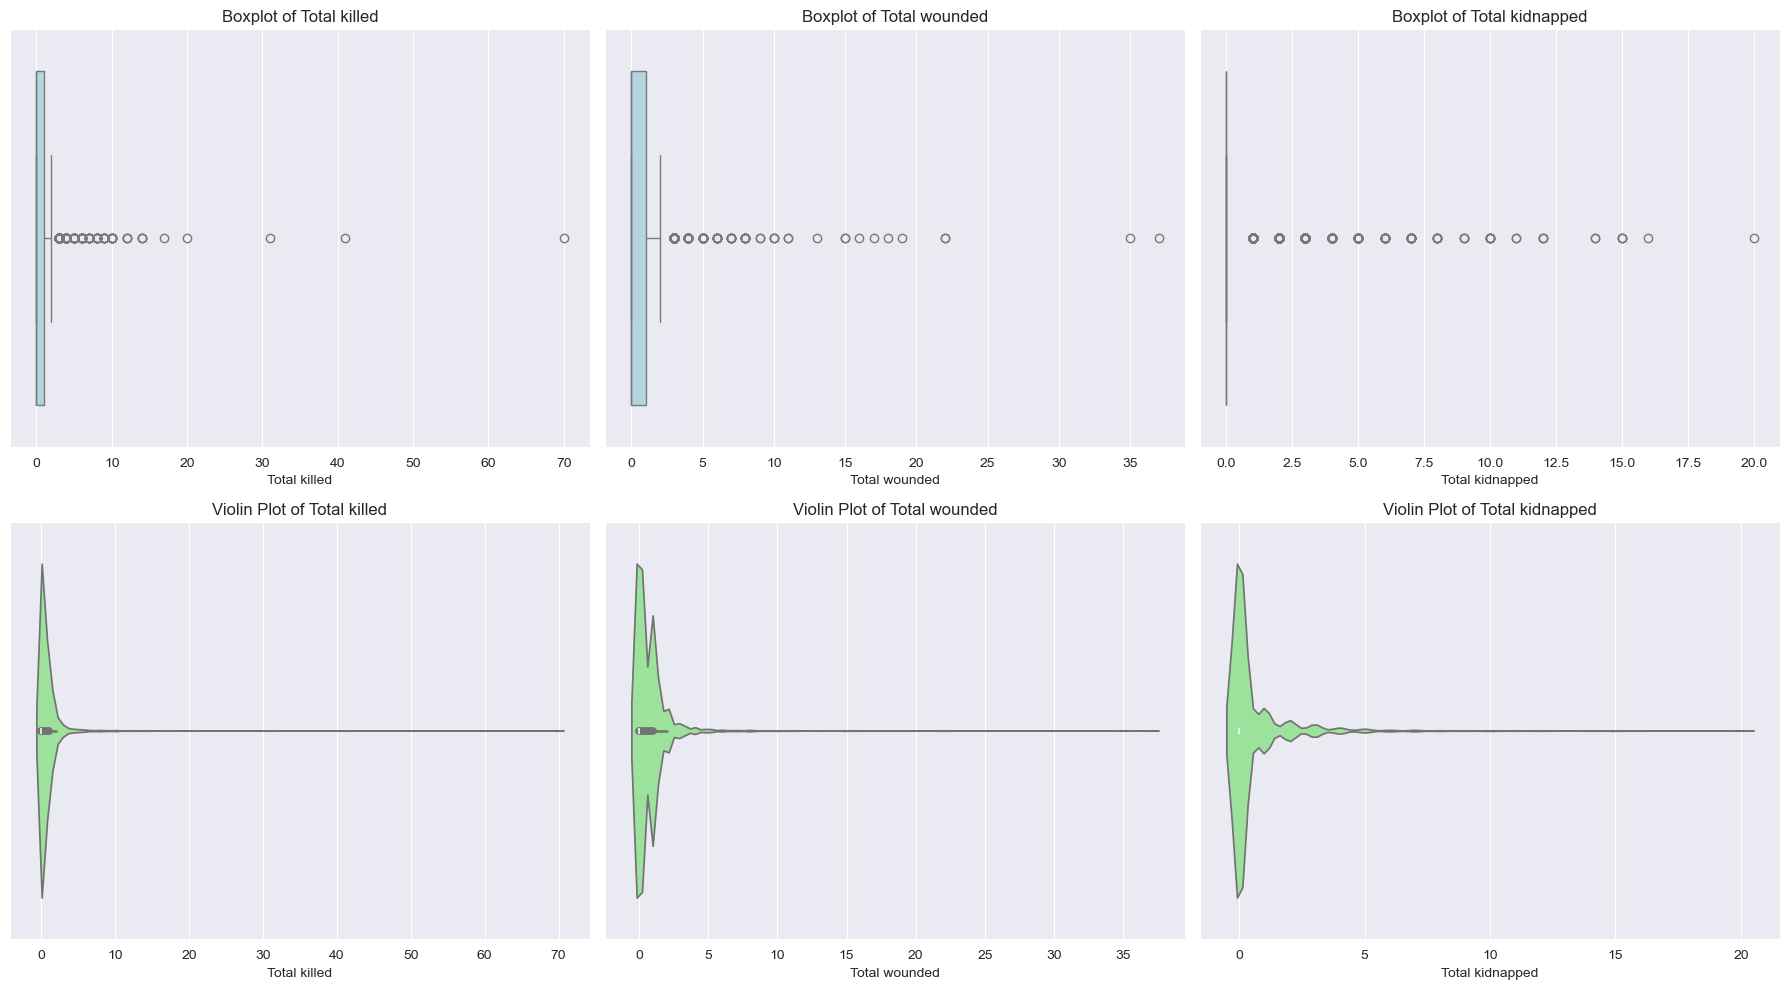

In [202]:

# Univariate Analysis

# List of metrics to analyze
metrics = ['Total killed', 'Total wounded', 'Total kidnapped']

# Create a figure with 2 rows and 3 columns: one row for boxplots and one for violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, metric in enumerate(metrics):
    # Boxplot for the metric
    sns.boxplot(x=incidents[metric], ax=axes[0, i], color='lightblue')
    axes[0, i].set_title(f"Boxplot of {metric}")
    axes[0, i].set_xlabel(metric)
    
    # Violin plot for the metric
    sns.violinplot(x=incidents[metric], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f"Violin Plot of {metric}")
    axes[1, i].set_xlabel(metric)

plt.tight_layout()
plt.show()



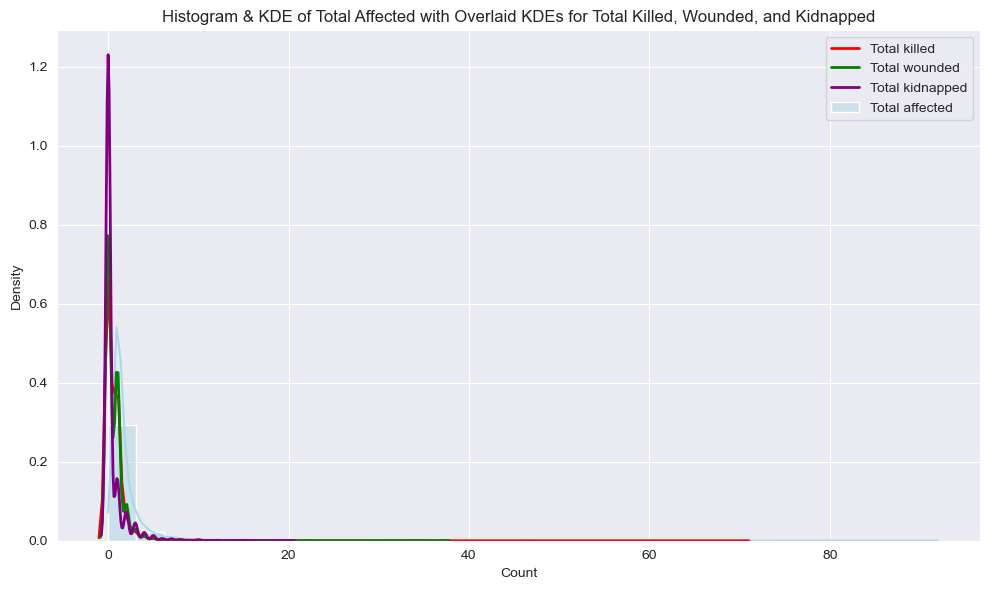

In [204]:
plt.figure(figsize=(10, 6))

# Plot histogram with KDE for "Total affected" (normalized to density for comparison)
sns.histplot(incidents['Total affected'], bins=30, stat='density', color='lightblue', kde=True, label='Total affected')

# Overlay KDE plots for the three specific columns
sns.kdeplot(incidents['Total killed'], color='red', linewidth=2, label='Total killed')
sns.kdeplot(incidents['Total wounded'], color='green', linewidth=2, label='Total wounded')
sns.kdeplot(incidents['Total kidnapped'], color='purple', linewidth=2, label='Total kidnapped')

plt.xlabel("Count")
plt.ylabel("Density")
plt.title("Histogram & KDE of Total Affected with Overlaid KDEs for Total Killed, Wounded, and Kidnapped")
plt.legend()
plt.tight_layout()
plt.show()

In [206]:
import folium

# Create a base map centered at the mean coordinates of your incidents
map_center = [incidents['Latitude'].mean(), incidents['Longitude'].mean()]
f_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each incident with a popup showing some details
for idx, row in incidents.iterrows():
    # Create a popup with the date and incident details
    popup_text = f"Date: {row['Date'].date()}<br>Total affected: {row['Total affected']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(f_map)

# To display the map in a Jupyter Notebook:
f_map


--- Top 10 incident counts by Motive ---
       Motive  Incident Count
5     Unknown            1950
4   Political             812
2  Incidental             782
1    Economic             649
0    Disputed             120
3       Other              22




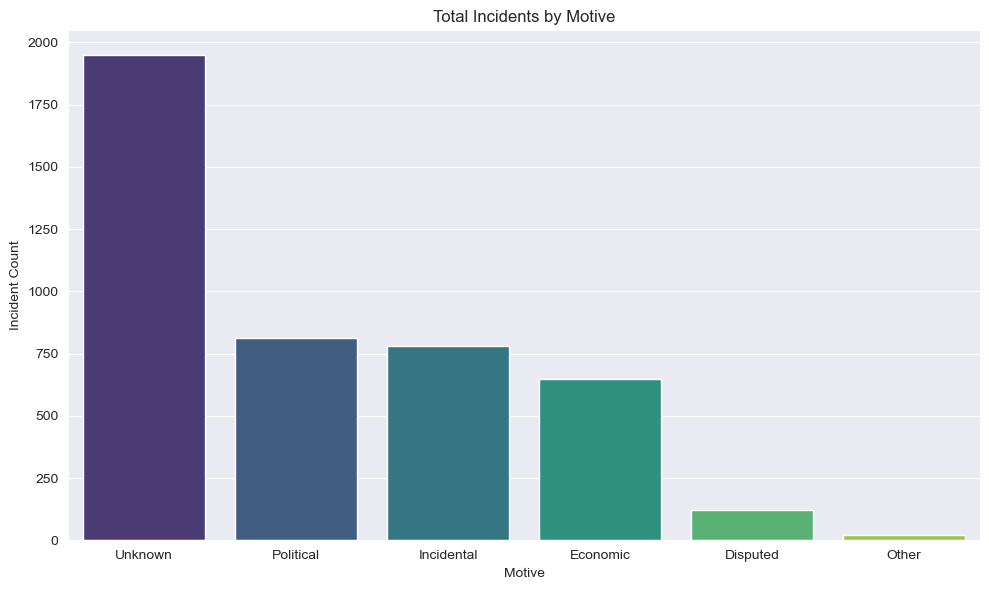

--- Top 10 incident counts by Means of attack ---
         Means of attack  Incident Count
11              Shooting            1240
5             Kidnapping             888
1         Bodily assault             835
12               Unknown             511
0     Aerial bombardment             263
10              Shelling             157
4         Kidnap-killing             111
13      Vehicle-born IED              76
9           Roadside IED              65
8   Rape/sexual assault               46




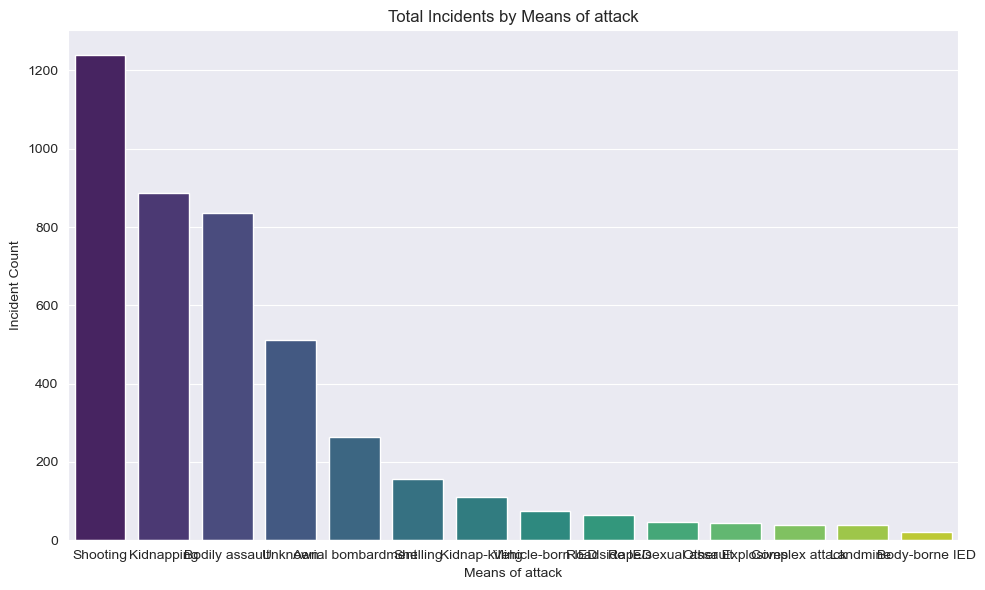

--- Top 10 incident counts by Attack context ---
      Attack context  Incident Count
0             Ambush            1400
3  Individual attack             873
6            Unknown             734
1   Combat/Crossfire             668
5               Raid             505
4       Mob violence              94
2          Detention              61




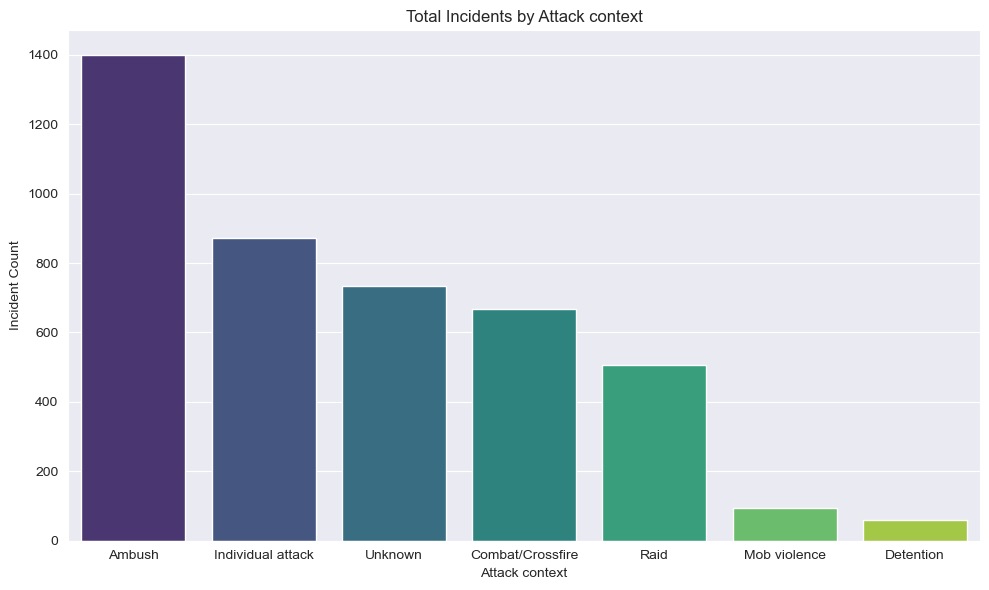

In [218]:
# Define the categorical variables to analyze
categorical_vars = ['Motive', 'Means of attack', 'Attack context']

# Loop through each categorical variable to calculate and plot incident counts
for var in categorical_vars:
    # Group by the variable and count the incidents (each row corresponds to one incident)
    group_counts = incidents.groupby(var).size().reset_index(name='Incident Count')
    # Sort the counts in descending order
    group_counts = group_counts.sort_values(by='Incident Count', ascending=False)
    
    # Print top 10 most frequent categories for this variable
    print(f"--- Top 10 incident counts by {var} ---")
    print(group_counts.head(10))
    print("\n")
    
    # Plot the counts as a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=group_counts, x=var, y='Incident Count', palette='viridis')
    plt.title(f"Total Incidents by {var}")
    plt.xlabel(var)
    plt.ylabel("Incident Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [220]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 1 to 4386
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      4335 non-null   int32         
 1   Month                     4335 non-null   Int64         
 2   Day                       4335 non-null   int64         
 3   Country Code              4301 non-null   object        
 4   Country                   4329 non-null   object        
 5   Region                    3967 non-null   object        
 6   District                  3598 non-null   object        
 7   City                      3346 non-null   object        
 8   UN                        4335 non-null   Int64         
 9   INGO                      4335 non-null   Int64         
 10  ICRC                      4326 non-null   Int64         
 11  NRCS and IFRC             4326 non-null   Int64         
 12  NNGO                     

In [226]:
#incidents['Verified'].value_counts(normalize = True)
incidents['Verified'] = incidents['Verified'].replace("Pen", "Pending")
incidents['Verified'].value_counts(normalize = True)

Verified
Yes         0.724735
Archived    0.166128
Pending     0.109137
Name: proportion, dtype: float64

In [228]:
# Map the 'Verified' statuses to a numeric confidence score
confidence_map = {'Yes': 2, 'Archived': 1, 'Pending': 0}
incidents['Data_Confidence'] = incidents['Verified'].map(confidence_map)

In [244]:
incidents['Actor Type'] = incidents['Actor Type'].str.strip().str.title()
incidents['Actor Type'].value_counts()

Actor Type
Unknown                               2287
Non-State Armed Group: Unknown         375
Non-State Armed Group: National        351
Unaffiliated                           223
Host State                             218
Foreign Or Coalition Forces            201
Non-State Armed Group: Regional        184
Non-State Armed Group: Subnational     146
Criminal                               132
Police Or Paramilitary                  88
Aid Recipient                           62
Staff Member                            35
Non-State Armed Group: Global           33
Name: count, dtype: int64

In [222]:
incidents[['Date', 'Country', 'Total affected','Total Casualties', 'Total Fatalities', 'Latitude', 'Longitude', 'Motive', 'Attack type','Actor Type',   

Year  Month  Day Country Code       Country            Region  \
Incident ID                                                                  
1            1997      1   14           KH      Cambodia  Banteay Meanchey   
2            1997      1   14           RW        Rwanda          Northern   
3            1997      2   14           TJ    Tajikistan               NaN   
4            1997      2   14           SO       Somalia        Lower Juba   
5            1997      2   14           RW        Rwanda            Kigali   
6            1997      5    7           SL  Sierra Leone               NaN   
7            1997      5    7           CD      DR Congo               NaN   
12           1997      6    8           RW        Rwanda          Northern   
8            1997      6   14           RW        Rwanda          Northern   
9            1997      6   17           RW        Rwanda          Northern   

            District       City  UN  INGO  ...      Motive  \
Incident ID                                ...               
1                NaN        NaN   0     0  ...     Unknown   
2            Musanze  Ruhengeri   0     4  ...     Unknown   
3                NaN        NaN   4     0  ...     Unknown   
4            Kismayo    Kismayo   0     1  ...   Political   
5             Kigali     Kigali   1     0  ...   Political   
6                NaN        NaN   3     0  ...     Unknown   
7                NaN        NaN   0     0  ...  Incidental   
12           Musanze  Ruhengeri   0     1  ...  Incidental   
8            Musanze  Ruhengeri   1     0  ...   Political   
9            Musanze  Ruhengeri   1     0  ...   Political   

                                  Actor type  \
Incident ID                                    
1                                    Unknown   
2                                    Unknown   
3                                    Unknown   
4            Non-state armed group: Regional   
5                                    Unknown   
6                                    Unknown   
7            Non-state armed group: National   
12                                   Unknown   
8             Non-state armed group: Unknown   
9                                    Unknown   

                                                    Actor name  \
Incident ID                                                      
1                                                      Unknown   
2                                                      Unknown   
3                                                      Unknown   
4                                       Al-Itihaad al-Islamiya   
5                                                      Unknown   
6                                                      Unknown   
7            Alliance of Democratic Forces for the Liberati...   
12                                                     Unknown   
8                                               Not applicable   
9                                                      Unknown   

                                                       Details  Verified  \
Incident ID                                                                
1            1 ICRC national staff killed while working in ...  Archived   
2            3 INGO international (Spanish) staff killed, 1...  Archived   
3            3 UN national staff, 1 UN international (Niger...  Archived   
4            1 INGO international staff killed by Al ittiha...  Archived   
5            1 UN national staff shot and killed in Kigali ...  Archived   
6            1 UN national staff driver killed and 2 UN nat...  Archived   
7            10 NRCS staff first aid workers killed in figh...  Archived   
12           1 INGO national staff killed when he was among...  Archived   
8            1 UN national staff shot and killed in Ruhenge...  Archived   
9            1 UN national staff shot and killed in Ruhenge...  Archived   

               Source       Date                